In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [3]:
data_with_index = df.set_index("Projects")
data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
Projects,,,,,,,,
Activiti,automation,1,0,1,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0,0
airsonic,media,1,0,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
nacos,infrastructure management,1,0,0,0,0,0,0


In [4]:
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)

Hibernate      94
JPA            67
Spring         45
EclipseLink    14
jOOQ            7
JDBC            0
dtype: int64

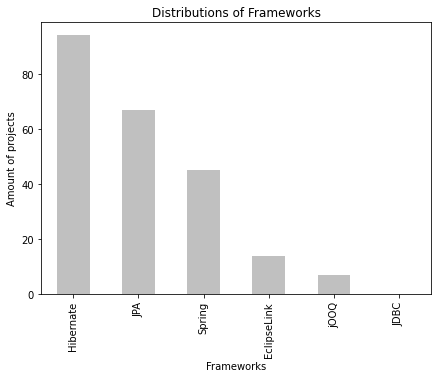

In [5]:
plt.figure(figsize=(7,5))
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [7]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

<ipython-input-54-6edab03061c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns = {'First-Level':'DB-Code', 'Second-Level': 'Dependencies'}, inplace = True)


<AxesSubplot:xlabel='Projects'>

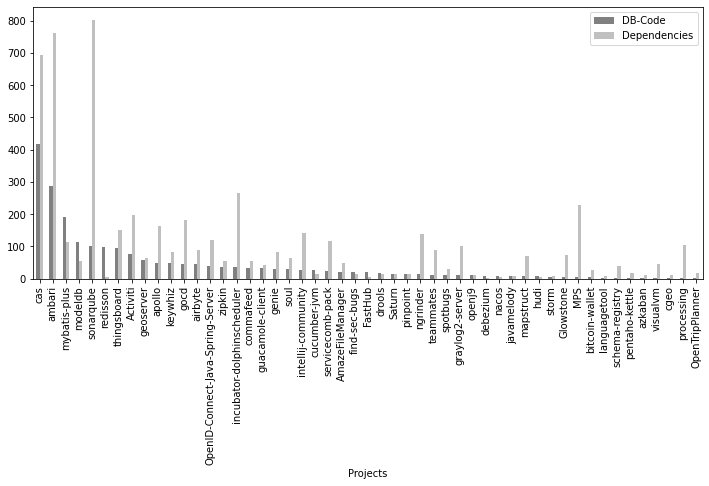

In [ ]:
data_with_index = data_with_index.iloc[: , :].sort_values(by='First-Level', ascending=False)
filtered_df = data_with_index[data_with_index['Total']> 10]
#filtered_df.rename(columns = {'First-Level':'DB-Code', 'Second-Level': 'Dependencies'}, inplace = True)
fig, ax = plt.subplots()
filtered_df.iloc[: , :3].plot.bar(x='Projects', ax=ax, color=('gray', 'silver'), figsize=(12,5))
#plt.ylabel("Amount of files")
#sns.distplot(medias, hist=True, kde=True, bins=20)